The term "machine learning" is surrounded by a mix of excitement and concerns. Some may call it "artificial intelligence" to highlight its complexity, while others might simplify it by dismissing it as nothing more than "glorified statistics." In reality, the boundary between traditional statistical modeling and the realm of "machine learning" is quite subtle.

In [34]:
# Get the latest version of scikit-learn (library for machine learning)
! pip install --upgrade scikit-learn

In [35]:
# Check the scikit-learn version. It should be 1.3.2.
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\colto\anaconda3\lib\site-packages
Requires: threadpoolctl, scipy, numpy, joblib
Required-by: scikit-learn-intelex


In [36]:
import numpy as np # performing calculations on arrays
import pandas as pd # dealing with dataframe

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

# For tokenizing text and build a machine learning model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Preprocessing

In [37]:
# Load the data
trump = pd.read_csv("Data/trump.csv")
trump

Unnamed: 0.1  Unnamed: 0  \
0                0           1   
1                1           2   
2                2           3   
3                3           4   
4                4           5   
...            ...         ...   
1507          1507        1508   
1508          1508        1509   
1509          1509        1510   
1510          1510        1511   
1511          1511        1512   

                                                   text  favorited  \
0     My economic policy speech will be carried live...      False   
1     Join me in Fayetteville, North Carolina tomorr...      False   
2     #ICYMI: "Will Media Apologize to Trump?" https...      False   
3     Michael Morell, the lightweight former Acting ...      False   
4     The media is going crazy. They totally distort...      False   
...                                                 ...        ...   
1507  "@constant4change: Trump tops Dem candidates o...      False   
1508  "@autumnandews08: @realDonaldTrump @jonkarl Hi...      False   
1509  "@DomineekSmith: @realDonaldTrump is the best ...      False   
1510  Another great accolade for @TrumpGolf. Highly ...      False   
1511  Record of Health: https://t.co/ZDDDawwYVl\n#Ma...      False   

      favoriteCount replyToSN              created  truncated  replyToSID  \
0              9214       NaN  2016-08-08 15:20:44      False         NaN   
1              6981       NaN  2016-08-08 13:28:20      False         NaN   
2             15724       NaN  2016-08-08 00:05:54      False         NaN   
3             19837       NaN  2016-08-07 23:09:08      False         NaN   
4             34051       NaN  2016-08-07 21:31:46      False         NaN   
...             ...       ...                  ...        ...         ...   
1507           2590       NaN  2015-12-20 08:21:23      False         NaN   
1508           3550       NaN  2015-12-20 05:25:13      False         NaN   
1509           3719       NaN  2015-12-20 05:11:04      False         NaN   
1510           2304       NaN  2015-12-14 21:11:12      False         NaN   
1511           2599       NaN  2015-12-14 20:09:15      False         NaN   

                      id  replyToUID  \
0     762669882571980801         NaN   
1     762641595439190016         NaN   
2     762439658911338496         NaN   
3     762425371874557952         NaN   
4     762400869858115588         NaN   
...                  ...         ...   
1507  678490367285678081         NaN   
1508  678446032599040001         NaN   
1509  678442470720577537         NaN   
1510  676509769562251264         NaN   
1511  676494179216805888         NaN   

                                           statusSource       screenName  \
0     <a href="http://twitter.com/download/android" ...  realDonaldTrump   
1     <a href="http://twitter.com/download/iphone" r...  realDonaldTrump   
2     <a href="http://twitter.com/download/iphone" r...  realDonaldTrump   
3     <a href="http://twitter.com/download/android" ...  realDonaldTrump   
4     <a href="http://twitter.com/download/android" ...  realDonaldTrump   
...                                                 ...              ...   
1507  <a href="http://twitter.com/download/android" ...  realDonaldTrump   
1508  <a href="http://twitter.com/download/android" ...  realDonaldTrump   
1509  <a href="http://twitter.com/download/android" ...  realDonaldTrump   
1510  <a href="http://twitter.com/download/iphone" r...  realDonaldTrump   
1511  <a href="http://twitter.com/download/iphone" r...  realDonaldTrump   

      retweetCount  isRetweet  retweeted  longitude  latitude  
0             3107      False      False        NaN       NaN  
1             2390      False      False        NaN       NaN  
2             6691      False      False        NaN       NaN  
3             6402      False      False        NaN       NaN  
4            11717      False      False        NaN       NaN  
...            ...        ...        ...        ...  

In [38]:
# Convert texts into a matrix of word counts
vectorizer = CountVectorizer(max_features = 500) # Select the top 500 words
sparse_matrix = vectorizer.fit_transform(trump['text']) # Fit and transform the original text into a matrix
termdoc = pd.DataFrame(sparse_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# Convert the matrix to dataframe, using words as column names
termdoc

00  000  10  100  11  12  15  16  7pm  about  ...  wrong  year  years  \
0      0    0   0    0   0   1   1   0    0      0  ...      0     0      0   
1      0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
2      0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
3      0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
4      0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
...   ..  ...  ..  ...  ..  ..  ..  ..  ...    ...  ...    ...   ...    ...   
1507   0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
1508   0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
1509   0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
1510   0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
1511   0    0   0    0   0   0   0   0    0      0  ...      0     0      0   

      yesterday  yet  york  you  your  zero  ¼í  
0             0    0     0    0     0     0   0  
1             0    0     0    0     0     0   0  
2             0    0     0    0     0     0   0  
3             0    0     0    0     0     0   0  
4             0    0     0    0     0     0   0  
...         ...  ...   ...  ...   ...   ...  ..  
1507          0    0     0    0     0     0   0  
1508          0    0     0    1     0     0   0  
1509          0    0     0    1     0     0   0  
1510          0    0     0    1     0     0   0  
1511          0    0     0    0     0     0   0  

[1512 rows x 500 columns]

In [39]:
# We want to begin with predicting what did Trump use to tweet. Let's see what "statusSource" looks like
trump.groupby('statusSource')['id'].count() 

statusSource
<a href="http://instagram.com" rel="nofollow">Instagram</a>                               1
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      120
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>         1
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    762
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      628
Name: id, dtype: int64

In [40]:
# Converting labels to numbers
def sourcestring_to_integer(sourcestring):
    if 'android' in sourcestring:
        return 0
    elif 'iphone' in sourcestring:
        return 1
    else:
        return 2

In [41]:
trump['statusSource']= trump['statusSource'].map(sourcestring_to_integer) # map statusSource to 0, 1 or 2
trump = trump[(trump['statusSource']==0) | (trump['statusSource']==1)] # keep 0 and 1 only (Android or iPhone)
trump

Unnamed: 0.1  Unnamed: 0  \
0                0           1   
1                1           2   
2                2           3   
3                3           4   
4                4           5   
...            ...         ...   
1507          1507        1508   
1508          1508        1509   
1509          1509        1510   
1510          1510        1511   
1511          1511        1512   

                                                   text  favorited  \
0     My economic policy speech will be carried live...      False   
1     Join me in Fayetteville, North Carolina tomorr...      False   
2     #ICYMI: "Will Media Apologize to Trump?" https...      False   
3     Michael Morell, the lightweight former Acting ...      False   
4     The media is going crazy. They totally distort...      False   
...                                                 ...        ...   
1507  "@constant4change: Trump tops Dem candidates o...      False   
1508  "@autumnandews08: @realDonaldTrump @jonkarl Hi...      False   
1509  "@DomineekSmith: @realDonaldTrump is the best ...      False   
1510  Another great accolade for @TrumpGolf. Highly ...      False   
1511  Record of Health: https://t.co/ZDDDawwYVl\n#Ma...      False   

      favoriteCount replyToSN              created  truncated  replyToSID  \
0              9214       NaN  2016-08-08 15:20:44      False         NaN   
1              6981       NaN  2016-08-08 13:28:20      False         NaN   
2             15724       NaN  2016-08-08 00:05:54      False         NaN   
3             19837       NaN  2016-08-07 23:09:08      False         NaN   
4             34051       NaN  2016-08-07 21:31:46      False         NaN   
...             ...       ...                  ...        ...         ...   
1507           2590       NaN  2015-12-20 08:21:23      False         NaN   
1508           3550       NaN  2015-12-20 05:25:13      False         NaN   
1509           3719       NaN  2015-12-20 05:11:04      False         NaN   
1510           2304       NaN  2015-12-14 21:11:12      False         NaN   
1511           2599       NaN  2015-12-14 20:09:15      False         NaN   

                      id  replyToUID  statusSource       screenName  \
0     762669882571980801         NaN             0  realDonaldTrump   
1     762641595439190016         NaN             1  realDonaldTrump   
2     762439658911338496         NaN             1  realDonaldTrump   
3     762425371874557952         NaN             0  realDonaldTrump   
4     762400869858115588         NaN             0  realDonaldTrump   
...                  ...         ...           ...              ...   
1507  678490367285678081         NaN             0  realDonaldTrump   
1508  678446032599040001         NaN             0  realDonaldTrump   
1509  678442470720577537         NaN             0  realDonaldTrump   
1510  676509769562251264         NaN             1  realDonaldTrump   
1511  676494179216805888         NaN             1  realDonaldTrump   

      retweetCount  isRetweet  retweeted  longitude  latitude  
0             3107      False      False        NaN       NaN  
1             2390      False      False        NaN       NaN  
2             6691      False      False        NaN       NaN  
3             6402      False      False        NaN       NaN  
4            11717      False      False        NaN       NaN  
...            ...        ...        ...        ...       ...  
1507           990      False      False        NaN       NaN  
1508          1146      False      False        NaN       NaN  
1509          1151      False      False        NaN       NaN  
1510           713      False      False        NaN       NaN  
1511           952      False      False        NaN       NaN  

[1390 rows x 18 columns]

In [42]:
# First we have to shuffle the rows, as we're going to use the first 1000 rows as training set, and that might not be a random
trump = trump.sample(frac=1, random_state = 10) # This means we are keeping all data but have changed the order
trump

Unnamed: 0.1  Unnamed: 0  \
7                7           8   
32              32          33   
311            311         312   
147            147         148   
1458          1458        1459   
...            ...         ...   
1261          1261        1262   
1465          1465        1466   
573            573         574   
1263          1263        1264   
1403          1403        1404   

                                                   text  favorited  \
7     .@Larry_Kudlow - 'Donald Trump Is the middle-c...      False   
32    Thank you to the amazing law enforcement offic...      False   
311   #MakeAmericaGreatAgain #ImWithYou\nhttps://t.c...      False   
147   Crooked Hillary Clinton wants to flood our cou...      False   
1458  "@creta_r: @realDonaldTrump Looking forward to...      False   
...                                                 ...        ...   
1261  The Better Business Bureau report, with an A r...      False   
1465  I am self funding my campaign so I do not owe ...      False   
573   "@southpaw816: @SenSanders fans, greatest way ...      False   
1263  Senator Sessions will serve as the \nChairman ...      False   
1403  Loved the debate last night, and almost everyo...      False   

      favoriteCount replyToSN              created  truncated  replyToSID  \
7             19543       NaN  2016-08-07 02:03:39      False         NaN   
32            34588       NaN  2016-08-03 22:10:11      False         NaN   
311           15279       NaN  2016-07-12 02:12:19      False         NaN   
147           54206       NaN  2016-07-27 10:08:35      False         NaN   
1458           6439       NaN  2016-01-28 04:26:38      False         NaN   
...             ...       ...                  ...        ...         ...   
1261          18624       NaN  2016-03-04 04:30:45      False         NaN   
1465          13385       NaN  2016-01-27 21:21:04      False         NaN   
573           10389       NaN  2016-06-08 12:00:55      False         NaN   
1263          14258       NaN  2016-03-04 01:20:00      False         NaN   
1403          11297       NaN  2016-02-14 20:55:59      False         NaN   

                      id  replyToUID  statusSource       screenName  \
7     762106904436961280         NaN             1  realDonaldTrump   
32    760960985524043777         NaN             1  realDonaldTrump   
311   752686998826131456         NaN             1  realDonaldTrump   
147   758242674646323200         NaN             0  realDonaldTrump   
1458  692564413811941376         NaN             0  realDonaldTrump   
...                  ...         ...           ...              ...   
1261  705611414128500736         NaN             1  realDonaldTrump   
1465  692457315941900288         NaN             1  realDonaldTrump   
573   740513939574951936         NaN             0  realDonaldTrump   
1263  705563410528915457         NaN             1  realDonaldTrump   
1403  698973988891009024         NaN             0  realDonaldTrump   

      retweetCount  isRetweet  retweeted  longitude  latitude  
7             7930      False      False        NaN       NaN  
32           10168      False      False        NaN       NaN  
311           5392      False      False        NaN       NaN  
147          16640      False      False        NaN       NaN  
1458          2099      False      False        NaN       NaN  
...            ...        ...        ...        ...       ...  
1261          8612      False      False        NaN       NaN  
1465          4696      False      False        NaN       NaN  
573           3429      False      False        NaN       NaN  
1263          6281      False      False        NaN       NaN  
1403          3305      False      False        NaN       NaN  

[1390 rows x 18 columns]

In [43]:
# The list of keys (label to be predicted) for our prediction
source_keys = trump['statusSource']
source_keys

7       1
32      1
311     1
147     0
1458    0
       ..
1261    1
1465    1
573     0
1263    1
1403    0
Name: statusSource, Length: 1390, dtype: int64

In [44]:
# Select the word counts to match the index of the keys
termdoc = termdoc.loc[source_keys.index]
termdoc

00  000  10  100  11  12  15  16  7pm  about  ...  wrong  year  years  \
7      0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
32     0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
311    0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
147    0    0   0    0   0   0   0   0    0      1  ...      0     0      0   
1458   0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
...   ..  ...  ..  ...  ..  ..  ..  ..  ...    ...  ...    ...   ...    ...   
1261   0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
1465   0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
573    0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
1263   0    0   0    0   0   0   0   0    0      0  ...      0     0      0   
1403   0    0   0    0   0   0   0   0    0      0  ...      0     0      0   

      yesterday  yet  york  you  your  zero  ¼í  
7             0    0     0    0     0     0   0  
32            0    0     0    1     0     0   0  
311           0    0     0    0     0     0   0  
147           0    0     0    0     0     0   0  
1458          0    0     0    0     0     0   0  
...         ...  ...   ...  ...   ...   ...  ..  
1261          0    0     0    0     0     0   0  
1465          0    0     0    0     0     0   0  
573           0    0     0    1     0     0   0  
1263          0    0     0    0     0     0   0  
1403          0    0     0    0     0     0   0  

[1390 rows x 500 columns]

In [45]:
# We have to scale the matrix to reduce the power of frequent words (so that all data points will fall into the range of 0-1)
# In this way, the model will work better 
scaled_matrix = StandardScaler().fit_transform(termdoc)
scaled_matrix

array([[-0.11454053, -0.09056352, -0.08512565, ..., -0.17997929,
        -0.09331813, -0.05534905],
       [-0.11454053, -0.09056352, -0.08512565, ..., -0.17997929,
        -0.09331813, -0.05534905],
       [-0.11454053, -0.09056352, -0.08512565, ..., -0.17997929,
        -0.09331813, -0.05534905],
       ...,
       [-0.11454053, -0.09056352, -0.08512565, ..., -0.17997929,
        -0.09331813, -0.05534905],
       [-0.11454053, -0.09056352, -0.08512565, ..., -0.17997929,
        -0.09331813, -0.05534905],
       [-0.11454053, -0.09056352, -0.08512565, ..., -0.17997929,
        -0.09331813, -0.05534905]])

# Machine Learning: Train an Exact Model

We can use the features in our matrix to predict whether a tweet came from android or iphone. It's possible to fit a model perfectly to the data. And if we're predicting the data we trained on, we'll be exactly right.
The key element of the next line is C, which is "inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization." Here, C = 10000000, which sets the regularization constant so high that it has no effect. There will be no blurriness in this model.
First we train the model.

In [46]:
# Using the first 1000 rows as the training set (note that we've already shuffled the data)
exact_model = LogisticRegression(C = 10000000).fit(scaled_matrix[:1000], source_keys[:1000])

The logistic model is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. It is commonly used in machine learning tasks. The goal is to model the probability of a random variable being 0 or 1 given experimental data.

In [47]:
# Then we make predictions using the model we trained (on the same data)
predictions = exact_model.predict(scaled_matrix[:1000])

In [48]:
# Let's see if the predicted results match the true labels
for i in range(20):
    if i in source_keys: # This is necessary because some rows are removed if they don't contain "Android" or "iPhone"
        print(source_keys[i], predictions[i])

0 1
1 1
1 1
0 0
0 0
0 0
1 0
1 1
0 0
1 0
0 0
0 1
0 0
0 1
1 1
1 0
1 1
1 0
1 0


In [49]:
# Calculate the proportion of true predictions
sum(predictions == source_keys[:1000]) / len(predictions)

1.0

In [50]:
# Then we try to make predictions outside the sample we originally trained on
test_predictions = exact_model.predict(scaled_matrix[1000 : , ])
sum(test_predictions == source_keys[1000 : ]) / len(test_predictions)

0.7461538461538462

One way to understand the problem is to look at predicted probabilities. This model tends to be very confident. Things are either iPhone (up at 1) or Android (down at 0). Colors indicate the real class values: red is android.

In [51]:
def colorize(integer):
    if integer == 1:
        return 'Blue'
    else:
        return 'Red'

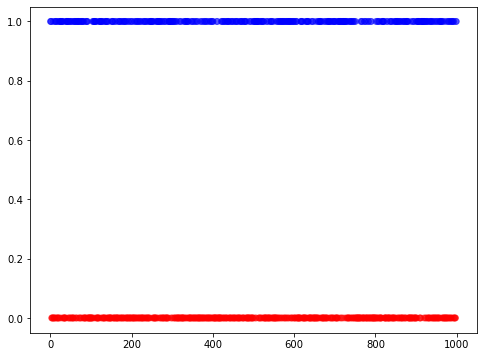

In [52]:
# First we test the confidence of the model on the training data
probabilities_train_exact = [x[1] for x in exact_model.predict_proba(scaled_matrix[:1000, ])]
# Here, we calculate the probability for the model assigning the data to the second class, namely, "iPhone"
colors_train_exact = [colorize(x) for x in source_keys[: 1000]]

plt.figure(figsize = (8, 6))
plt.scatter(list(range(len(probabilities_train_exact))), probabilities_train_exact, c = colors_train_exact, alpha = 0.4)
plt.show()

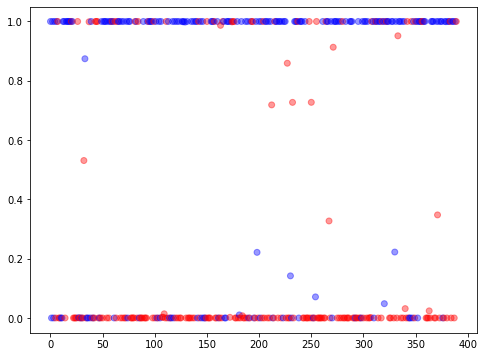

In [53]:
# Then we test the confidence of the model on the testing data
probabilities_test_exact = [x[1] for x in exact_model.predict_proba(scaled_matrix[1000:, ])]
colors_test_exact = [colorize(x) for x in source_keys[1000:]]

plt.figure(figsize = (8, 6))
plt.scatter(list(range(len(probabilities_test_exact))), probabilities_test_exact, c = colors_test_exact, alpha = 0.4)
plt.show()

# Machine Learning: Train an Blurred Model

To improve our accuracy out of sample, we need to be willing to let the model be imperfect.
We can achieve this by using a regularization setting that limits the predictive power of features.

In [54]:
# Let's change C value to 0.001 so that blurriness (randomness) is introduced to the model
blurry_model = LogisticRegression(C = 0.001).fit(scaled_matrix[0 : 1000, ], source_keys[0: 1000])

In [55]:
# Make predictions within the sample we originally trained on
predictions = blurry_model.predict(scaled_matrix[0 : 1000, ])
sum(predictions == source_keys[0:1000]) / len(predictions)

0.857

In [56]:
# Then we try to make predictions outside the sample we originally trained on
test_predictions = blurry_model.predict(scaled_matrix[1000 : , ])
sum(test_predictions == source_keys[1000 : ]) / len(test_predictions)

0.8

And we can intuitively understand how that's working by looking at the predicted probabilities for individual tweets. This model is a lot less "confident" about any individual tweet.

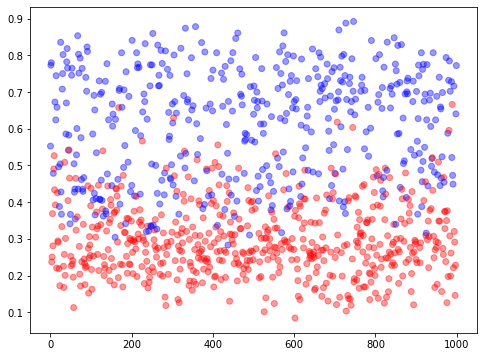

In [57]:
# First we test the confidence of the model on the training data using the blurry model
probabilities_train_blurry = [x[1] for x in blurry_model.predict_proba(scaled_matrix[:1000, ])]
colors_train_blurry = [colorize(x) for x in source_keys[: 1000]]

plt.figure(figsize = (8, 6))
plt.scatter(list(range(len(probabilities_train_blurry))), probabilities_train_blurry, c = colors_train_blurry, alpha = 0.4)
plt.show()

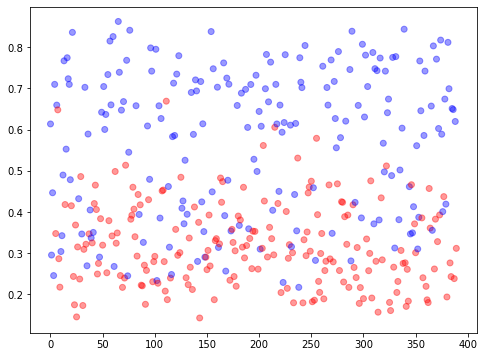

In [58]:
# Then we test the confidence of the model on the testing data using the blurry model
probabilities_test_blurry = [x[1] for x in blurry_model.predict_proba(scaled_matrix[1000:, ])]
colors_test_blurry = [colorize(x) for x in source_keys[1000:]]

plt.figure(figsize = (8, 6))
plt.scatter(list(range(len(probabilities_test_blurry))), probabilities_test_blurry, c = colors_test_blurry, alpha = 0.4)
plt.show()

# Task 1

Create two new blurry models with different C values of 0.00001 and 0.01. For each model, duplicate the code for fitting the model with the first 1000 data points and predicting the data points after 1000. For each model, please answer: does the accuracy rate for the training set increase or decrease when compared to the original model with a C value of 0.001? Does the accuracy rate for the testing set increase or decrease when compared to the original model? What insights can be drawn from the impact of the C parameter on the model's performance?<br>
Include your codes in the following cell (code) and the discussion in the next cell (markdown).

0.565
0.5051282051282051


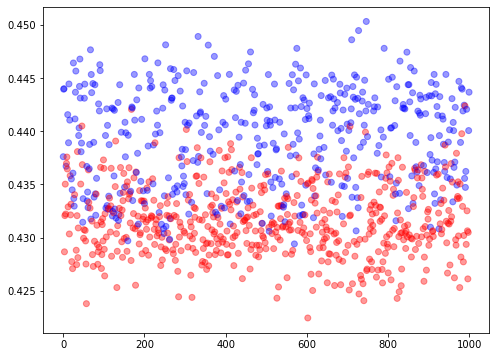

0.96
0.7974358974358975


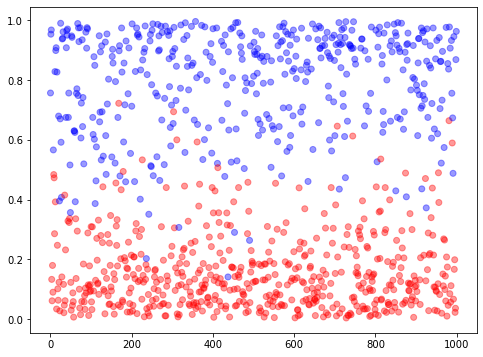

In [59]:
blurry_model1 = LogisticRegression(C = 0.00001).fit(scaled_matrix[0 : 1000, ], source_keys[0: 1000])
predictions1 = blurry_model1.predict(scaled_matrix[0 : 1000, ])
print(sum(predictions1 == source_keys[0:1000]) / len(predictions1))
test_predictions1 = blurry_model1.predict(scaled_matrix[1000 : , ])
print(sum(test_predictions1 == source_keys[1000 : ]) / len(test_predictions1))
probabilities_train_blurry1 = [x[1] for x in blurry_model1.predict_proba(scaled_matrix[:1000, ])]
colors_train_blurry1 = [colorize(x) for x in source_keys[: 1000]]
plt.figure(figsize = (8, 6))
plt.scatter(list(range(len(probabilities_train_blurry1))), probabilities_train_blurry1, c = colors_train_blurry1, alpha = 0.4)
plt.show()




blurry_model2 = LogisticRegression(C = 0.01).fit(scaled_matrix[0 : 1000, ], source_keys[0: 1000])
predictions2 = blurry_model2.predict(scaled_matrix[0 : 1000, ])
print(sum(predictions2 == source_keys[0:1000]) / len(predictions2))
test_predictions2 = blurry_model2.predict(scaled_matrix[1000 : , ])
print(sum(test_predictions2 == source_keys[1000 : ]) / len(test_predictions2))
probabilities_train_blurry2 = [x[1] for x in blurry_model2.predict_proba(scaled_matrix[:1000, ])]
colors_train_blurry2 = [colorize(x) for x in source_keys[: 1000]]
plt.figure(figsize = (8, 6))
plt.scatter(list(range(len(probabilities_train_blurry2))), probabilities_train_blurry2, c = colors_train_blurry2, alpha = 0.4)
plt.show()

With extremely high randomess like in model 1 than we see very inaccurate and worse outcomes for both the predictions. For model 2 introducing a bit of randomness actual helps the model with a very accurate prediction score. For model 1 with extremely high randomness we have worse accuracy than the original model, and with model 2 we have higher accuracy in the predictive accuracy and close accuracy in the tested predictive accuracy. What this tells us about the C value is that a little bit of randomness is healthy for the machine learning model.

# Task 2

Reload the dataset and create a new vectorizer with the "max_features" parameter set to 5000. Then, recreate the sparse matrix, term-document matrix, scaled matrix, and the blurry model by duplicating the codes provided above. Calculate the accuracy rate for the testing data with the new setup. Does the accuracy rate increase or decrease when compared to the original model with a "max_features" of 500? What insights can be drawn about the impact of the number of features on machine learning based on word frequency?<br>
Include your codes in the following cell (code) and the discussion in the next cell (markdown).

In [60]:
trump = pd.read_csv("Data/trump.csv")
vectorizer2 = CountVectorizer(max_features = 5000) 
sparse_matrix2 = vectorizer2.fit_transform(trump['text']) 
termdoc2 = pd.DataFrame(sparse_matrix2.toarray(), columns=vectorizer2.get_feature_names_out())
termdoc2 = termdoc2.loc[source_keys.index]
scaled_matrix2 = StandardScaler().fit_transform(termdoc2)
blurry_model3 = LogisticRegression(C = 0.001).fit(scaled_matrix2[0 : 1000, ], source_keys[0: 1000])
predictions3 = blurry_model3.predict(scaled_matrix2[0 : 1000, ])
print(sum(predictions3 == source_keys[0:1000]) / len(predictions3))
test_predictions3 = blurry_model3.predict(scaled_matrix2[1000 : , ])
print(sum(test_predictions3 == source_keys[1000 : ]) / len(test_predictions3))

0.996
0.8333333333333334


With the new model accuracy is higher than the old '500 features' model. This gives us insight into the relationship between features and accuracy in machine learning as it seems to be a positive relationship. After some quick research features in machine learning allow for more pieces of mesaureable data. As we learned this can help the dataset and make it more accurate but we also want a focused model so "more features always more accurate" may not be the best analysis. But with considering that there is a positive relationship to a certain degree.

# Task 3

Reload the dataset and recreate a vectorizer by incorporating stop words (you can achieve this by specifying a new parameter when creating the CountVectorizer: "stop_words = stop_words_used"). Then, recreate the sparse matrix, term-document matrix, scaled matrix, and the blurry model by duplicating the codes provided above. Calculate the accuracy rate for the testing data with the new setup. Does the accuracy rate increase or decrease when compared to the original model without a stop word list? What insights can be drawn about the impact of stop words on machine learning based on word frequency?<br>
Include your codes in the following cell (code) and the discussion in the next cell (markdown).

In [61]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_used = stopwords.words('english')

trump = pd.read_csv("Data/trump.csv")
vectorizer_stopword = CountVectorizer(max_features = 500, stop_words = stop_words_used) 
sparse_matrix_stopword = vectorizer_stopword.fit_transform(trump['text'])
termdoc_stopword = pd.DataFrame(sparse_matrix_stopword.toarray(), columns=vectorizer_stopword.get_feature_names_out())
termdoc_stopword = termdoc_stopword.loc[source_keys.index]
scaled_matrix_stopword = StandardScaler().fit_transform(termdoc_stopword)
blurry_model_stopword = LogisticRegression(C = 0.001).fit(scaled_matrix_stopword[0 : 1000, ], source_keys[0: 1000])
probabilities_train_blurry_stopword = [x[1] for x in blurry_model_stopword.predict_proba(scaled_matrix[:1000, ])]
predictions_stopword = blurry_model_stopword.predict(scaled_matrix_stopword[0 : 1000, ])
print(sum(predictions_stopword == source_keys[0:1000]) / len(predictions_stopword))
test_predictions_stopword = blurry_model_stopword.predict(scaled_matrix_stopword[1000 : , ])
print(sum(test_predictions_stopword == source_keys[1000 : ]) / len(test_predictions_stopword))

0.87
0.8051282051282052


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\colto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The model with stopwords has a significantly worse accuracy then the previous model. This makes sense as we are analyzing Trumps often 'colloquial' language in his tweets. Adding stop words may remove certain words that would be associated with his Android or Iphone tweets. Hypothetically if it were to remove a hashtag or url trump shared alot on one of his posts this would mess with the data and accuracy of the model.

# Finding the Features That Lead to Differentiation

In [62]:
# Reload the original model. This is unnecessary if you always give the new variables new names
trump = pd.read_csv("Data/trump.csv")
vectorizer = CountVectorizer(max_features = 500)
sparse_matrix = vectorizer.fit_transform(trump['text'])
termdoc = pd.DataFrame(sparse_matrix.toarray(), columns=vectorizer.get_feature_names_out())
termdoc = termdoc.loc[source_keys.index]
scaled_matrix = StandardScaler().fit_transform(termdoc)
blurry_model = LogisticRegression(C = 0.001).fit(scaled_matrix[0 : 1000, ], source_keys[0: 1000])

In [63]:
coefs = blurry_model.coef_
coefs = zip(coefs[0], vectorizer.get_feature_names_out()) # load the words and their weights into dictionary
coefs = sorted(coefs) # sort to find the top words that lead to differentiation

In [64]:
# words that suggest posted via iPhone
coefs[0:10]

[(-0.10342277040591821, 'realdonaldtrump'),
 (-0.05844929699548615, 'and'),
 (-0.05605521539372897, 'the'),
 (-0.04975030980032629, 'is'),
 (-0.0462910712486807, 'trump'),
 (-0.04098790340428868, 'are'),
 (-0.03871925237252498, 'that'),
 (-0.03614937712062732, '00'),
 (-0.0350105049412957, 'megynkelly'),
 (-0.03463746227791514, 'than')]

In [65]:
# words that suggest posted via Android
coefs[-10:]

[(0.031520462726903314, 'trumppence16'),
 (0.031624234496627636, 'imwithyou'),
 (0.03243869069982664, 'amp'),
 (0.03763946984603057, 'americafirst'),
 (0.040955688456980235, 'join'),
 (0.043749569510282756, 'makeamericagreatagain'),
 (0.060279250989956214, 'thank'),
 (0.07920734938584943, 'trump2016'),
 (0.12618188881786746, 'co'),
 (0.12719236926526017, 'https')]

# Task 4

Examine the top 10 words that suggest tweets posted via iPhone and the top 10 words that suggest tweets posted via Android.  Write a short paragraph to explore the commonalities within each group of words, and draw assumptions about Trump's tweeting preferences. What types of tweets he tended to post via Android, and what types of tweets he tended to post via iPhone?

I would say both android and iphone most used words from his posts both heavily have to do with his campaigning. Whats interesting though is that android seems to be hashtags or phrases from his campaign or the 'https' being from urls he shares through his android. While with Iphone we see alot of individual names like journalist Megyn kelly, himself 'Trump', and 'TheRealDonaldTrump' which probably is his twitter tag or the username of some of his socials. But with Iphone we see alot of commonly used english words like is, are, that as he may be elaborating into more detail on some of these political/media members. The similarities have to do with the topics being discussed mostly with Trumps election or trends to bash others on his platforms. Saying that an individual is 'this or that'. While the way he talks about his campaign on android has alot to do with hashtags, and posting urls.

# Classifying Based on Retweet Numbers

In [66]:
# Convert retweet number to two categories
def map_retweet(number):
    if number <= 5000: 
        return 0
    else:
        return 1
trump['retweetCount']= trump['retweetCount'].map(map_retweet)
trump = trump.sample(frac=1, random_state = 10) 
trump

Unnamed: 0.1  Unnamed: 0  \
339            339         340   
146            146         147   
1356          1356        1357   
1315          1315        1316   
1447          1447        1448   
...            ...         ...   
1393          1393        1394   
1344          1344        1345   
527            527         528   
1149          1149        1150   
1289          1289        1290   

                                                   text  favorited  \
339   Even the once great Caesars is bankrupt in A.C...      False   
146   Our not very bright Vice President, Joe Biden,...      False   
1356  Ted Cruz should be disqualified from his fraud...      False   
1315  "@itsblakec: @realDonaldTrump Trump is a geniu...      False   
1447  "@stephbewitching @realDonaldTrump All you hat...      False   
...                                                 ...        ...   
1393  JEB is a hypocrite! Used massive private "Emin...      False   
1344  THANK YOU LAS VEGAS, NEVADA!\n#NevadaCaucus #V...      False   
527   Join me in Atlanta on Wednesday- at noon! #Tru...      False   
1149  So the highly overrated anchor, @megynkelly, i...      False   
1289  My wife @MELANIATRUMP will be #OnTheRecord w/ ...      False   

      favoriteCount replyToSN              created  truncated  replyToSID  \
339           14936       NaN  2016-07-06 13:24:50      False         NaN   
146           38199       NaN  2016-07-27 12:57:20      False         NaN   
1356           8287       NaN  2016-02-22 21:11:17      False         NaN   
1315           7750       NaN  2016-02-27 04:53:34      False         NaN   
1447          10449       NaN  2016-02-02 19:44:56      False         NaN   
...             ...       ...                  ...        ...         ...   
1393           7296       NaN  2016-02-15 17:29:40      False         NaN   
1344           8866       NaN  2016-02-23 05:19:29      False         NaN   
527           12617       NaN  2016-06-14 00:20:57      False         NaN   
1149          27373       NaN  2016-03-20 19:10:55      False         NaN   
1289           9731       NaN  2016-03-02 19:54:30      False         NaN   

                      id  replyToUID  \
339   750681915565477888         NaN   
146   758285141982711808         NaN   
1356  701876939095543808         NaN   
1315  703442830211964928         NaN   
1447  694607450750717952         NaN   
...                  ...         ...   
1393  699284455282884612         NaN   
1344  701999802033111040         NaN   
527   742512112614944768         NaN   
1149  711631122036293632         NaN   
1289  705119106052308992         NaN   

                                           statusSource       screenName  \
339   <a href="http://twitter.com/download/android" ...  realDonaldTrump   
146   <a href="http://twitter.com/download/android" ...  realDonaldTrump   
1356  <a href="http://twitter.com/download/android" ...  realDonaldTrump   
1315  <a href="http://twitter.com/download/android" ...  realDonaldTrump   
1447  <a href="http://twitter.com" rel="nofollow">Tw...  realDonaldTrump   
...                                                 ...              ...   
1393  <a href="http://twitter.com/download/iphone" r...  realDonaldTrump   
1344  <a href="http://twitter.com/download/iphone" r...  realDonaldTrump   
527   <a href="http://twitter.com/download/iphone" r...  realDonaldTrump   
1149  <a href="http://twitter.com/download/android" ...  realDonaldTrump   
1289  <a href="http://twitter.com/download/iphone" r...  realDonaldTrump   

      retweetCount  isRetweet  retweeted  longitude  latitude  
339              0      False      False        NaN       NaN  
146              1      False      False        NaN       NaN  
1356             0      False      False        NaN       NaN  
1315             0      False      False        NaN       NaN  
1447             0      False      False        NaN       NaN  
...            ...        ...        ...        ...  

In [67]:
# Regenerate the word matrix based on the new dataset
source_keys_retweet = trump['retweetCount']
vectorizer = CountVectorizer(max_features = 500)
sparse_matrix = vectorizer.fit_transform(trump['text'])
termdoc = pd.DataFrame(sparse_matrix.toarray(), columns=vectorizer.get_feature_names_out())
termdoc_retweet = termdoc.loc[source_keys_retweet.index]
scaled_matrix_retweet= StandardScaler().fit_transform(termdoc_retweet)
scaled_matrix_retweet

array([[-0.10976426, -0.08680428, -0.08560635, ..., -0.1762674 ,
        -0.09312598, -0.05306253],
       [-0.10976426, -0.08680428, -0.08560635, ..., -0.1762674 ,
        -0.09312598, -0.05306253],
       [-0.10976426, -0.08680428, -0.08560635, ..., -0.1762674 ,
        -0.09312598, -0.05306253],
       ...,
       [-0.10976426, -0.08680428, -0.08560635, ..., -0.1762674 ,
        -0.09312598, -0.05306253],
       [-0.10976426, -0.08680428, -0.08560635, ..., -0.1762674 ,
        -0.09312598, -0.05306253],
       [-0.10976426, -0.08680428, -0.08560635, ..., -0.1762674 ,
        -0.09312598, -0.05306253]])

# Task 5

Create a new model for predicting the number of retweets (source_keys_retweet) using the scaled_matrix_retweet created above. Calculate the new accuracy rate in predicting whether a tweet has more than 5000 retweets or not. Is this accuracy rate high? Note that random classification would yield an accuracy of 0.5. What insights can be derived from this result?<br>
Include your codes in the following cell (code) and the discussion in the next cell (markdown).

In [72]:
source_keys_retweet5 = trump['retweetCount']
vectorizer5 = CountVectorizer(max_features = 5000)
sparse_matrix5 = vectorizer5.fit_transform(trump['text'])
termdoc5 = pd.DataFrame(sparse_matrix5.toarray(), columns=vectorizer5.get_feature_names_out())
termdoc_retweet5 = termdoc5.loc[source_keys_retweet5.index]
scaled_matrix_retweet5= StandardScaler().fit_transform(termdoc_retweet5)

retweet_blurry_model = LogisticRegression(C = 0.001).fit(scaled_matrix_retweet5[0 : 1000, ], source_keys[0: 1000])
predictions_retweet = retweet_blurry_model.predict(scaled_matrix_retweet5[1000: , ])
print(sum(predictions_retweet == source_keys_retweet5[1000 : ]) / len(predictions_retweet))

0.458984375


The new accuracy rate for a model with 5000 retweets or below has a very poor accurracy. This can be explained by what I was referring to above with the relatinoship between features and accuracy being that too high of features may lead to the mudding of the data, meaning it is less clear the results with so many samples. Having a .45 means that these results are less than random classification which may imply that are results were truly confused by the large amount of Trump tweets under 5000 retweets. Another thing to pull away is that there is a random component to what tweets do get reciprocated with high amounts of retweets especially with Trumps following. Maybe global events or news cycles could impact the average Americans news consumption and social media engagement with policiticans. So this unclear behavior with individuals and their social media behavior are important cofounders that could explain why its so hard for our model to predict what whether a tweet gets over 5000 retweets. 